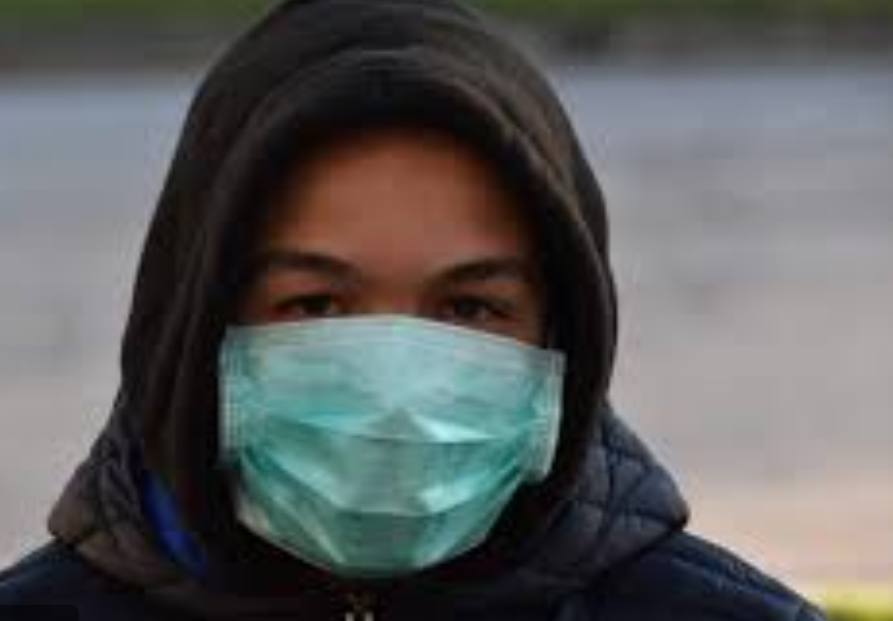

# Disclaimer! This kernel is only for educational purposes and made for fun therefor the content of the kernel should not be taken to seriously.

In this kernel we will plot maps to show the spead of coronavirus when the dataset was uploaded and we want to make a mashine learning model that finds what country you are in, with the knowdege about confirmed, deaths, recovered cases there are.

# Import liberary

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#recovered = recovered.fillna('unknow')
#deaths = deaths.fillna('unknow')
import numpy as np 
import pandas as pd 

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
import pycountry
py.init_notebook_mode(connected=True)
import folium 
from folium import plugins

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# Import data

In [ ]:
import pandas as pd
nCoV_data = pd.read_csv("../input/novel-corona-virus-2019-dataset/2019_nCoV_data.csv")
COVID19_line_list_data = pd.read_csv("../input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv")
COVID19_open_line_list = pd.read_csv("../input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv")
covid_19_data = pd.read_csv("../input/novel-corona-virus-2019-dataset/covid_19_data.csv")
time_series_covid_19_confirmed = pd.read_csv("../input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv")
time_series_covid_19_deaths = pd.read_csv("../input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv")
time_series_covid_19_recovered = pd.read_csv("../input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv")

# Combining data 

In [ ]:
df=time_series_covid_19_confirmed 

In [ ]:
# take latitude and longitude to plot maps. 
features=['Lat', 'Long', 'Country/Region']
df=df[features]
df = df.rename(columns={'Country/Region': 'Country'})
df.head()

In [ ]:
# Reading more data
data= pd.read_csv("../input/novel-corona-virus-2019-dataset/2019_nCoV_data.csv")
data.head()

In [ ]:
#Remove nan-values in strings
Confirmed = data.fillna('unknow')
Recovered = data.fillna('unknow')
Deaths = data.fillna('unknow')
data['Province/State'] = data['Province/State'].fillna('unknow')

In [ ]:
data.isnull().sum()

In [ ]:
#how many are confirmed

#copy data 
data1=data.copy()
Number_of_countries = len(data1['Country'].value_counts())

#group country and confirmed
cases = pd.DataFrame(data1.groupby('Country')['Confirmed'].sum())
cases['Country'] = cases.index
cases.index=np.arange(1,Number_of_countries+1)

# sort and pint new dataframe
global_cases = cases[['Country','Confirmed']]
global_cases.sort_values(by=['Confirmed'],ascending=False)
global_cases.head()

In [ ]:
# Merging the coordinates with dataframe (data)
world_data = pd.merge(df,global_cases,on='Country')
world_data.head()

In [ ]:
# create map and display how many got coronavirus with folium
world_map = folium.Map(location=[10, -20], zoom_start=1,tiles='Stamen Toner')

for lat, lon, value, name in zip(world_data['Lat'], world_data['Long'], world_data['Confirmed'], world_data['Country']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        popup = ('<strong>Country</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Confirmed Cases</strong>: ' + str(value) + '<br>'),
                        color='red',
                        
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(world_map)
#print map
world_map



In [ ]:
#make a heatmap

import folium
from folium import Choropleth, Marker
from folium.plugins import HeatMap, MarkerCluster
m = folium.Map(location=[40, -70], zoom_start=1) 
def embed_map(m, file_name):
    from IPython.display import IFrame
    m.save(file_name)
    return IFrame(file_name, width='100%', height='750px')


# Add a heatmap to the base map
HeatMap(data=world_data[['Lat', 'Long']], radius=11).add_to(m)

# Show the map
embed_map(m, "q_1.html")

### Making the dataset that will be used in the training of a model

In [ ]:
# Merging a coordinates dataframe with the original dataframe
world_model = pd.merge(df,data,on='Country')
world_model.head()

# Prep for model

We want to use the countries, so we label encode them.

In [ ]:
#print the country column
data['Country']

In [ ]:
data.columns

## Label encoding 

In [ ]:
from sklearn.preprocessing import LabelEncoder
# creating initial dataframe
bridge_types = ('Sno', 'Date', 'Province/State', 'Country', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered')
countries = pd.DataFrame(data, columns=['Country'])
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
data['Countries'] = labelencoder.fit_transform(data['Country'])
data['Countries'].head()

In [ ]:
#print the whole dataset with the countries as a new column as label encoded
data.head()

# Model/predition

### we want to find what country you are in with the knowdege about confirmed, deaths, recovered cases there are.

In [ ]:
from sklearn.model_selection import train_test_split

# Read the data
X = data.copy()
#using the same data as testing is usally a bad idea, but this kernel is 
#just a concept but it whould be better to split them up.
X_test_full = data.copy()


# Remove rows with missing target, separate target from predictors
X.dropna(axis=0, subset=['Recovered'], inplace=True)
y = X.Recovered              
X.drop(['Country'], axis=1, inplace=True)
X.drop(['Date'], axis=1, inplace=True)
X.drop(['Sno'], axis=1, inplace=True)
X.drop(['Province/State'], axis=1, inplace=True)
X.drop(['Last Update'], axis=1, inplace=True)  
    
    # Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]
# Low cardinality means that the column contains a lot of “repeats” in its data range.
# Examples of categorical variables are race, sex, age group, and educational level. 
# While the latter two variables may also be considered in a numerical manner by using exact values for age 
# and highest grade completed
# nunique() function to find the number of unique values over the column axis. So when it finds over 10 uniqe 
# values and the cname is a 
# dtype 'object' which means Data type objects are useful for creating structured arrays. # A structured array is the one which contains different types of data.

### one line meaning of above####
## for cname in a dataframes column shall return a value to 'low_cardinality_cols' if there are more then 10 uniqe values
## and the dtype shall be a object which is a structured array that can have different types of data (lik; int, float string ect.)


# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]
### for cname (every value, one at the time) in dataframe for columns return a value to 'numeric_cols' if the 
### dtype= int64 or float64. 


my_cols = low_cardinality_cols + numeric_cols
# Keep selected columns onlymy_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

# One-hot encode the data (to shorten the code, we use pandas)
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)

In [ ]:
X_train.head()

In [ ]:
y.head()

In [ ]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
#from xgboost import XGBRegressor



model2 = RandomForestClassifier(n_estimators=150, max_depth=4, random_state=1)
model = GradientBoostingClassifier(random_state=1)
model3 = DecisionTreeClassifier(max_depth=3, random_state=1)
#model=SGDClassifier(random_state=1)
#model=ExtraTreesClassifier(random_state=1)
#model = XGBRegressor()
# Define the models
model_1 = RandomForestClassifier(n_estimators=50, random_state=0)
model_2 = RandomForestClassifier(n_estimators=100, random_state=0)
model_3 = RandomForestClassifier(n_estimators=200, min_samples_split=20, random_state=0)
model_4 = RandomForestClassifier(n_estimators=300, max_depth=6, random_state=1)



model.fit(X_train, y_train)
y_predictions = model.predict(X_valid)

print('model accuracy score',model.score(X_valid,y_valid))

In [ ]:
y_test=y_valid
X_test=X_valid

In [ ]:
model2.fit(X_train,y_train)
print(f'Model test accuracy: {model2.score(X_test, y_test)*100:.3f}%')
model3.fit(X_train,y_train)
print(f'Model test accuracy: {model3.score(X_test, y_test)*100:.3f}%')

In [ ]:
model_1.fit(X_train,y_train)
print(f'Model test accuracy: {model_1.score(X_test, y_test)*100:.3f}%')
model_2.fit(X_train,y_train)
print(f'Model test accuracy: {model_2.score(X_test, y_test)*100:.3f}%')
model_3.fit(X_train,y_train)
print(f'Model test accuracy: {model_3.score(X_test, y_test)*100:.3f}%')
model_4.fit(X_train,y_train)
print(f'Model test accuracy: {model_4.score(X_test, y_test)*100:.3f}%')

The highst prediction was 89% but though it whould be more corret model, if there was used data, and the test and training data splittet up, though we use a validation split of 20%. This is way we dont think it is so bad.